In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import time
from sklearn.cluster import KMeans

In [2]:
# initialize dataset
N = 441
k = 150
x = []
y = []
np.random.seed(1)

for j in range(0,21):
  for k in range(0,21):
    x.append([-2+0.2*j,-2+0.2*k])

for i in range(0,N):
  f = (x[i][0]**2+x[i][1]**2)
  
  if f <= 1:
    x[i].append(1)
  else:
    x[i].append(-1)

x = np.array(x).reshape(N,3)
# the first two columns represents for the sample data points, and the last column is their label
print(x)

[[-2.  -2.  -1. ]
 [-2.  -1.8 -1. ]
 [-2.  -1.6 -1. ]
 ...
 [ 2.   1.6 -1. ]
 [ 2.   1.8 -1. ]
 [ 2.   2.  -1. ]]


In [3]:
# train/test split with train:test=8:2
pct=0.2
np.random.shuffle(x)
train,test = x[int(N*pct):],x[:int(N*pct)]

# seperate the sampled data points x and the labels y
train_x = train[:,:-1]
test_x = test[:,:-1]

train_y = train[:,-1:]
test_y = test[:,-1:]


In [4]:
# define a class of RBF Neural Network
class RBFNN(object):
  def __init__(self,k,sigma):
    random.seed(1)
    self.k = k
    self.weights = None
    self.sigma = sigma
    self.weights = np.random.randn(k)
    self.centers = None

  def kernel_function(self,x,center):

    return np.exp(-1/(2*self.sigma**2)*np.linalg.norm(x-center)**2);

  # calculate interpolation matrix and return G
  def interpolation_matrix(self,x):
    n = x.shape[0]
       
    G = np.empty((n,self.k))
    for i in range(0,n):
      for j in range(0,k):     
        G[i,j] = self.kernel_function(x[i],self.centers[j])
    return G
  # define different center selection methods
  def select_full(self,x):
    centers = x
    return centers
  
  def select_randomly(self,x):
    n = x.shape[0]

    random_args = np.random.choice(n,k)
    centers = x[random_args]
    return centers

  def select_kmeans(self,x):
    
    kmeans = KMeans(n_clusters=k, random_state=0).fit(x)
    centers = kmeans.cluster_centers_
    return centers

  def fit_full(self,x,y):
    
    self.centers = self.select_full(x)  
    G = self.interpolation_matrix(x)   
    self.weights = np.dot(np.linalg.pinv(G),y) 
    cost = np.square((np.dot(G,self.weights))-y).mean()
    return cost
  
  def fit_randomly(self,x,y):
    
    self.centers = self.select_randomly(x)  
    G = self.interpolation_matrix(x)
    self.weights = np.dot(np.linalg.pinv(G),y)
    cost = np.square((np.dot(G,self.weights))-y).mean()   
    return cost

  def fit_kmeans(self,x,y):
    
    self.centers = self.select_kmeans(x)  
    G = self.interpolation_matrix(x)
    self.weights = np.dot(np.linalg.pinv(G),y)
    cost = np.square((np.dot(G,self.weights))-y).mean()
    return cost

  def predict(self,x,y):
    G = self.interpolation_matrix(x)  
    pred = np.dot(G,self.weights)
    pred = np.sign(pred)
    accuracy = (pred==y).mean()*100
    return accuracy
  
  def __del__(self):

    self.weights = None
    self.centers = None
      

In [5]:
train_accuracy_list_full = []
train_accuracy_list_random = []
train_accuracy_list_kmeans = []

accuracy_list_full = []
cost_list_full = []
accuracy_list_random = []
cost_list_random = []
accuracy_list_kmeans = []
cost_list_kmeans = []
sigmas = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,11,12,13,14,15,20,50,100,1000]

In [6]:

def part1_b():
  # Perform the design of the RBF NN, using all training datapoints

    for sigma in sigmas:     
      rbf_full = RBFNN(k=150,sigma=sigma)
      
      cost_2 = rbf_full.fit_full(train_x,train_y)
      acc_1 = rbf_full.predict(train_x,train_y)
      acc_2 = rbf_full.predict(test_x,test_y)

      train_accuracy_list_full.append(acc_1) 
      accuracy_list_full.append(acc_2) 
      cost_list_full.append(cost_2)

    del rbf_full
    
part1_b()


In [7]:
def part2_b():
  # Perform the design of the RBF NN, using this time only 150 centers
  # Kmeans implementation
    for sigma in sigmas:     
      rbf_kmeans = RBFNN(k=150,sigma=sigma)
      
      cost_2 = rbf_kmeans.fit_kmeans(train_x,train_y)
      acc_1 = rbf_kmeans.predict(train_x,train_y)
      acc_2 = rbf_kmeans.predict(test_x,test_y)

      train_accuracy_list_kmeans.append(acc_1) 
      accuracy_list_kmeans.append(acc_2) 
      cost_list_kmeans.append(cost_2)

    del rbf_kmeans
    
part2_b()


In [8]:
def part2_a():
  # Perform the design of the RBF NN, using this time only 150 centers
  # Randomly select the centers from the input data
    for sigma in sigmas:     
      rbf_random = RBFNN(k=150,sigma=sigma)
      
      cost_2 = rbf_random.fit_randomly(train_x,train_y)
      acc_1 = rbf_random.predict(train_x,train_y)
      acc_2 = rbf_random.predict(test_x,test_y)

      train_accuracy_list_random.append(acc_1) 
      accuracy_list_random.append(acc_2) 
      cost_list_random.append(cost_2)
    del rbf_random
    
part2_a()


<function matplotlib.pyplot.show>

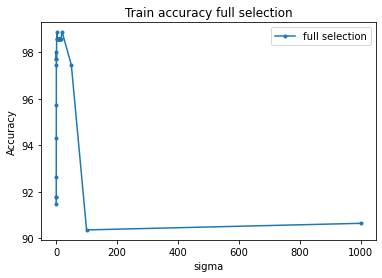

In [9]:
# 
plt.plot(sigmas,train_accuracy_list_full,marker='.',label="full selection")
plt.xlabel('sigma')
plt.ylabel('Accuracy')
plt.title('Train accuracy full selection')
plt.legend()
plt.show


<function matplotlib.pyplot.show>

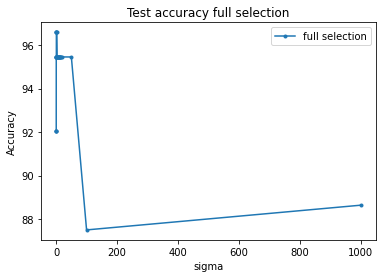

In [10]:
# 
plt.plot(sigmas,accuracy_list_full,marker='.',label="full selection")
plt.xlabel('sigma')
plt.ylabel('Accuracy')
plt.title('Test accuracy full selection')
plt.legend()
plt.show


<function matplotlib.pyplot.show>

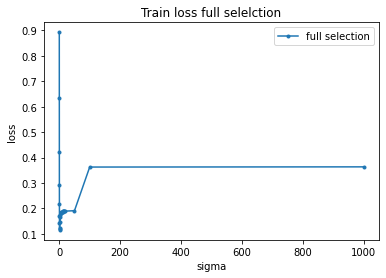

In [11]:
plt.plot(sigmas,cost_list_full,marker='.',label="full selection")
plt.xlabel('sigma')
plt.ylabel('loss')
plt.title('Train loss full selelction')
plt.legend()
plt.show

<function matplotlib.pyplot.show>

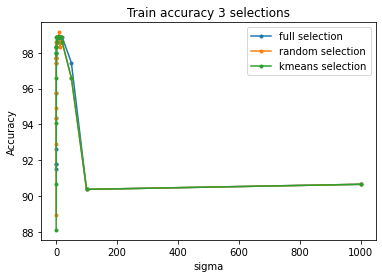

In [12]:
#plot
plt.plot(sigmas,train_accuracy_list_full,marker='.',label="full selection")
plt.plot(sigmas,train_accuracy_list_random,marker='.',label="random selection")
plt.plot(sigmas,train_accuracy_list_kmeans,marker='.',label="kmeans selection")

plt.xlabel('sigma')
plt.ylabel('Accuracy')
plt.title('Train accuracy 3 selections')
plt.legend()
plt.show

<function matplotlib.pyplot.show>

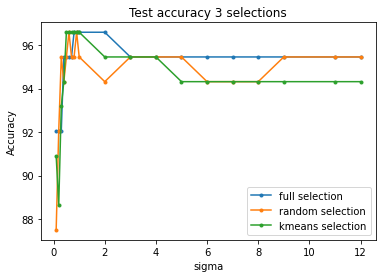

In [13]:
#plot
plt.plot(sigmas[:20],accuracy_list_full[:20],marker='.',label="full selection")
plt.plot(sigmas[:20],accuracy_list_random[:20],marker='.',label="random selection")
plt.plot(sigmas[:20],accuracy_list_kmeans[:20],marker='.',label="kmeans selection")

plt.xlabel('sigma')
plt.ylabel('Accuracy')
plt.title('Test accuracy 3 selections')
plt.legend()
plt.show

<function matplotlib.pyplot.show>

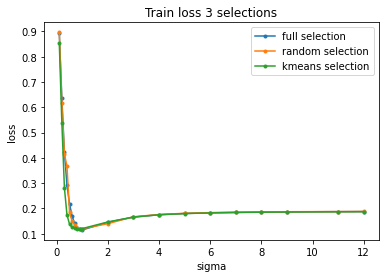

In [14]:
#plot
plt.plot(sigmas[:20],cost_list_full[:20],marker='.',label="full selection")
plt.plot(sigmas[:20],cost_list_random[:20],marker='.',label="random selection")
plt.plot(sigmas[:20],cost_list_kmeans[:20],marker='.',label="kmeans selection")

plt.xlabel('sigma')
plt.ylabel('loss')
plt.title('Train loss 3 selections')
plt.legend()
plt.show